# Agenda: Dates and times

1. Core concepts + data structures
2. Parsing dates + times
3. `.dt` accessor -- and using it
4. Comparisons
5. Timedelta
6. Grouper
7. Time series (index is `datetime`)
8. Resample

In [1]:
import pandas as pd


In [2]:
filename = 'taxi.csv'
df = pd.read_csv(filename)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,2015-06-01 00:12:59,2015-06-01 00:24:18,1,2.70,-73.947792,40.814972,1,N,-73.973358,40.783638,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
9995,1,2015-06-01 00:12:59,2015-06-01 00:28:16,1,4.50,-74.004066,40.747818,1,N,-73.953758,40.779285,1,16.0,0.5,0.5,3.00,0.0,0.3,20.30
9996,2,2015-06-01 00:13:00,2015-06-01 00:37:25,1,5.59,-73.994377,40.766102,1,N,-73.903206,40.750546,2,21.0,0.5,0.5,0.00,0.0,0.3,22.30
9997,2,2015-06-01 00:13:02,2015-06-01 00:19:10,6,1.54,-73.978302,40.748531,1,N,-73.989166,40.762852,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80


In [3]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

# `datetime` and `timedelta`

- `datetime` (or `timestamp` in some languages) -- unique point in time.
- `timedelta` (or `interval` in some languages) -- difference between two `datetime` values.

### Date math

- `datetime` + `timedelta` = `datetime`
- `datetime` - `datetime` = `timedelta`
- `datetime` - `timedelta` = `datetime`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               9999 non-null   int64  
 1   tpep_pickup_datetime   9999 non-null   object 
 2   tpep_dropoff_datetime  9999 non-null   object 
 3   passenger_count        9999 non-null   int64  
 4   trip_distance          9999 non-null   float64
 5   pickup_longitude       9999 non-null   float64
 6   pickup_latitude        9999 non-null   float64
 7   RateCodeID             9999 non-null   int64  
 8   store_and_fwd_flag     9999 non-null   object 
 9   dropoff_longitude      9999 non-null   float64
 10  dropoff_latitude       9999 non-null   float64
 11  payment_type           9999 non-null   int64  
 12  fare_amount            9999 non-null   float64
 13  extra                  9999 non-null   float64
 14  mta_tax                9999 non-null   float64
 15  tip_

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               9999 non-null   int64  
 1   tpep_pickup_datetime   9999 non-null   object 
 2   tpep_dropoff_datetime  9999 non-null   object 
 3   passenger_count        9999 non-null   int64  
 4   trip_distance          9999 non-null   float64
 5   pickup_longitude       9999 non-null   float64
 6   pickup_latitude        9999 non-null   float64
 7   RateCodeID             9999 non-null   int64  
 8   store_and_fwd_flag     9999 non-null   object 
 9   dropoff_longitude      9999 non-null   float64
 10  dropoff_latitude       9999 non-null   float64
 11  payment_type           9999 non-null   int64  
 12  fare_amount            9999 non-null   float64
 13  extra                  9999 non-null   float64
 14  mta_tax                9999 non-null   float64
 15  tip_

In [6]:
pd.to_datetime(df['tpep_pickup_datetime'])

0      2015-06-02 11:19:29
1      2015-06-02 11:19:30
2      2015-06-02 11:19:31
3      2015-06-02 11:19:31
4      2015-06-02 11:19:32
               ...        
9994   2015-06-01 00:12:59
9995   2015-06-01 00:12:59
9996   2015-06-01 00:13:00
9997   2015-06-01 00:13:02
9998   2015-06-01 00:13:04
Name: tpep_pickup_datetime, Length: 9999, dtype: datetime64[ns]

In [7]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               9999 non-null   int64         
 1   tpep_pickup_datetime   9999 non-null   datetime64[ns]
 2   tpep_dropoff_datetime  9999 non-null   datetime64[ns]
 3   passenger_count        9999 non-null   int64         
 4   trip_distance          9999 non-null   float64       
 5   pickup_longitude       9999 non-null   float64       
 6   pickup_latitude        9999 non-null   float64       
 7   RateCodeID             9999 non-null   int64         
 8   store_and_fwd_flag     9999 non-null   object        
 9   dropoff_longitude      9999 non-null   float64       
 10  dropoff_latitude       9999 non-null   float64       
 11  payment_type           9999 non-null   int64         
 12  fare_amount            9999 non-null   float64       
 13  ext

In [9]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(
    filepath_or_buffer: FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str],
    *,
    sep: str | None | lib.NoDefault = <no_default>,
    delimiter: str | None | lib.NoDefault = None,
    header: int | Sequence[int] | None | Literal['infer'] = 'infer',
    names: Sequence[Hashable] | None | lib.NoDefault = <no_default>,
    index_col: IndexLabel | Literal[False] | None = None,
    usecols: UsecolsArgType = None,
    dtype: DtypeArg | None = None,
    engine: CSVEngine | None = None,
    converters: Mapping[Hashable, Callable] | None = None,
    true_values: list | None = None,
    false_values: list | None = None,
    skipinitialspace: bool = False,
    skiprows: list[int] | int | Callable[[Hashable], bool] | None = None,
    skipfooter: int = 0,
    nrows: int | None = None,
    na_values: Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None = None,
    keep_default_na: bool = True,
  

In [10]:
df = pd.read_csv(filename,
                parse_dates=['tpep_pickup_datetime',
                            'tpep_dropoff_datetime'])

In [11]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

# `.dt` -- datetime accessor

I can use `.dt` to retrieve parts of the datetime:

- `.dt.year`
- `.dt.month`
- `.dt.hour`

In [14]:
df['tpep_pickup_datetime'].dt.month

0       6
1       6
2       6
3       6
4       6
       ..
9994    6
9995    6
9996    6
9997    6
9998    6
Name: tpep_pickup_datetime, Length: 9999, dtype: int32

In [16]:
dir(df['tpep_pickup_datetime'].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'as_unit',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is

In [17]:
df['tpep_pickup_datetime'].dt.dayofweek

0       1
1       1
2       1
3       1
4       1
       ..
9994    0
9995    0
9996    0
9997    0
9998    0
Name: tpep_pickup_datetime, Length: 9999, dtype: int32

In [18]:
df['tpep_pickup_datetime'].dt.day_name()

0       Tuesday
1       Tuesday
2       Tuesday
3       Tuesday
4       Tuesday
         ...   
9994     Monday
9995     Monday
9996     Monday
9997     Monday
9998     Monday
Name: tpep_pickup_datetime, Length: 9999, dtype: object

In [19]:
df['tpep_pickup_datetime'].dt.is_leap_year

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997    False
9998    False
Name: tpep_pickup_datetime, Length: 9999, dtype: bool

In [20]:
df['tpep_pickup_datetime'].dt.is_quarter_start

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997    False
9998    False
Name: tpep_pickup_datetime, Length: 9999, dtype: bool

In [21]:
df['tpep_pickup_datetime'].dt.quarter

0       2
1       2
2       2
3       2
4       2
       ..
9994    2
9995    2
9996    2
9997    2
9998    2
Name: tpep_pickup_datetime, Length: 9999, dtype: int32

# Exercises: NYC taxis

1. Read the July 2020 taxi data into a data frame. How big is it?
2. Read it in again, using `parse_dates`. Now how big is it? How much did you save?
3. How many rides were there on each day of the week?
4. How many rides were there on each hour of the day?
5. What was the mean `trip_distance` for weekends (Saturday-Sunday) vs. the rest of the week?

In [22]:
filename = 'nyc_taxi_2020-07.zip'

Get zipfile from here: https://files.lerner.co.il/all-data-exercise-files.zip

In [23]:
filename = 'nyc_taxi_2020-07.zip'

df = pd.read_csv(filename)

/var/folders/n7/3xckdj8j3dz45qz4xnlk1fy40000gn/T/ipykernel_45999/4269082390.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [24]:
!ls -lh $filename

-rw-r--r-- 1 reuven staff 15M Dec  4 10:15 nyc_taxi_2020-07.zip


In [25]:
df = pd.read_csv(filename, low_memory=False)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800412 entries, 0 to 800411
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               737565 non-null  float64
 1   tpep_pickup_datetime   800412 non-null  object 
 2   tpep_dropoff_datetime  800412 non-null  object 
 3   passenger_count        737565 non-null  float64
 4   trip_distance          800412 non-null  float64
 5   RatecodeID             737565 non-null  float64
 6   store_and_fwd_flag     737565 non-null  object 
 7   PULocationID           800412 non-null  int64  
 8   DOLocationID           800412 non-null  int64  
 9   payment_type           737565 non-null  float64
 10  fare_amount            800412 non-null  float64
 11  extra                  800412 non-null  float64
 12  mta_tax                800412 non-null  float64
 13  tip_amount             800412 non-null  float64
 14  tolls_amount           800412 non-nu

In [28]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800412 entries, 0 to 800411
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               737565 non-null  float64
 1   tpep_pickup_datetime   800412 non-null  object 
 2   tpep_dropoff_datetime  800412 non-null  object 
 3   passenger_count        737565 non-null  float64
 4   trip_distance          800412 non-null  float64
 5   RatecodeID             737565 non-null  float64
 6   store_and_fwd_flag     737565 non-null  object 
 7   PULocationID           800412 non-null  int64  
 8   DOLocationID           800412 non-null  int64  
 9   payment_type           737565 non-null  float64
 10  fare_amount            800412 non-null  float64
 11  extra                  800412 non-null  float64
 12  mta_tax                800412 non-null  float64
 13  tip_amount             800412 non-null  float64
 14  tolls_amount           800412 non-nu

In [29]:
df = pd.read_csv(filename, 
                 parse_dates=['tpep_pickup_datetime',
                             'tpep_dropoff_datetime'],
                 low_memory=False)

In [30]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800412 entries, 0 to 800411
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               737565 non-null  float64       
 1   tpep_pickup_datetime   800412 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  800412 non-null  datetime64[ns]
 3   passenger_count        737565 non-null  float64       
 4   trip_distance          800412 non-null  float64       
 5   RatecodeID             737565 non-null  float64       
 6   store_and_fwd_flag     737565 non-null  object        
 7   PULocationID           800412 non-null  int64         
 8   DOLocationID           800412 non-null  int64         
 9   payment_type           737565 non-null  float64       
 10  fare_amount            800412 non-null  float64       
 11  extra                  800412 non-null  float64       
 12  mta_tax                800412 non-null  floa

In [31]:
# 3. How many rides were there on each day of the week?

(
    df.groupby(df['tpep_pickup_datetime'].dt.dayofweek)['trip_distance'].count()
)

tpep_pickup_datetime
0    106208
1    115951
2    147489
3    149582
4    136094
5     79001
6     66087
Name: trip_distance, dtype: int64

In [32]:

(
    df.groupby(df['tpep_pickup_datetime'].dt.day_name())['trip_distance'].count()
)

tpep_pickup_datetime
Friday       136094
Monday       106208
Saturday      79001
Sunday        66087
Thursday     149582
Tuesday      115951
Wednesday    147489
Name: trip_distance, dtype: int64

In [34]:

(
    df['tpep_pickup_datetime'].dt.day_name()
    .value_counts()
)

tpep_pickup_datetime
Thursday     149582
Wednesday    147489
Friday       136094
Tuesday      115951
Monday       106208
Saturday      79001
Sunday        66087
Name: count, dtype: int64

<Axes: xlabel='tpep_pickup_datetime'>

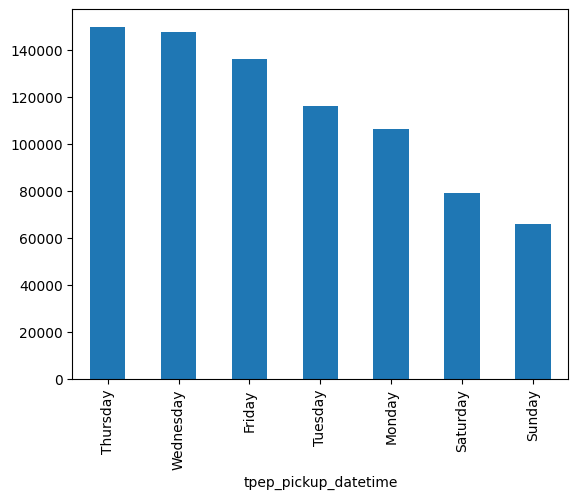

In [36]:
(
    df['tpep_pickup_datetime'].dt.day_name()
    .value_counts()
    .plot.bar()
)

<Axes: xlabel='tpep_pickup_datetime'>

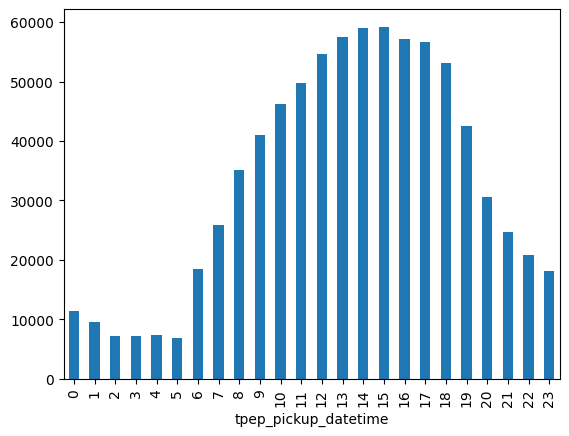

In [39]:
# 4. How many rides were there on each hour of the day?

(
    df['tpep_pickup_datetime'].dt.hour
    .value_counts()
    .sort_index()
    .plot.bar()
)

In [ ]:
# 5. What was the mean `trip_distance` for weekends (Saturday-Sunday) vs. the rest of the week?

df['is_weekend'] = False
df